In [42]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('data/test/games-november.csv')
df = df.drop(['Notes', 'Box Score'], axis=1)

df['Day'] = df['Date'].str.split(' ').str[0]

day_di = {'Sun': 1, 'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5, 'Fri': 6, 'Sat': 7}
df['Day_Num'] = df['Date'].str.split(' ').str[0]
df['Day_Num'].replace(day_di, inplace=True)

df.head(10)

,Date,Visitor,Visitor_PTS,Home,Home_PTS,#OTs,Attend.,Day,Day_Num
0,Mon Nov 01 2010 07:00pm,Portland Trail Blazers,98.0,Chicago Bulls,110.0,0.0,21057.0,Mon,2
1,Mon Nov 01 2010 07:30pm,San Antonio Spurs,97.0,Los Angeles Clippers,88.0,0.0,14964.0,Mon,2
2,Mon Nov 01 2010 07:00pm,Toronto Raptors,108.0,Sacramento Kings,111.0,0.0,17317.0,Mon,2
3,Tue Nov 02 2010 07:00pm,Atlanta Hawks,100.0,Cleveland Cavaliers,88.0,0.0,20562.0,Tue,3
4,Tue Nov 02 2010 07:30pm,Boston Celtics,109.0,Detroit Pistons,86.0,0.0,15313.0,Tue,3
5,Tue Nov 02 2010 07:30pm,Memphis Grizzlies,105.0,Los Angeles Lakers,124.0,0.0,18997.0,Tue,3
6,Tue Nov 02 2010 07:30pm,Minnesota Timberwolves,97.0,Miami Heat,129.0,0.0,19600.0,Tue,3
7,Tue Nov 02 2010 07:00pm,Portland Trail Blazers,90.0,Milwaukee Bucks,76.0,0.0,13087.0,Tue,3
8,Tue Nov 02 2010 07:00pm,Philadelphia 76ers,115.0,Washington Wizards,116.0,1.0,17803.0,Tue,3
9,Wed Nov 03 2010 07:00pm,Detroit Pistons,85.0,Atlanta Hawks,94.0,0.0,13003.0,Wed,4


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
time_dif = df['Date'][20] - df['Date'][1]
print(time_dif)

1 days 23:30:00


In [4]:
df['Spread'] = df['Home_PTS'] - df['Visitor_PTS']
df.head(10)

,Date,Visitor,Visitor_PTS,Home,Home_PTS,#OTs,Attend.,Day,Day_Num,Spread
0,2010-11-01 19:00:00,Portland Trail Blazers,98.0,Chicago Bulls,110.0,0.0,21057.0,Mon,2,12.0
1,2010-11-01 19:30:00,San Antonio Spurs,97.0,Los Angeles Clippers,88.0,0.0,14964.0,Mon,2,-9.0
2,2010-11-01 19:00:00,Toronto Raptors,108.0,Sacramento Kings,111.0,0.0,17317.0,Mon,2,3.0
3,2010-11-02 19:00:00,Atlanta Hawks,100.0,Cleveland Cavaliers,88.0,0.0,20562.0,Tue,3,-12.0
4,2010-11-02 19:30:00,Boston Celtics,109.0,Detroit Pistons,86.0,0.0,15313.0,Tue,3,-23.0
5,2010-11-02 19:30:00,Memphis Grizzlies,105.0,Los Angeles Lakers,124.0,0.0,18997.0,Tue,3,19.0
6,2010-11-02 19:30:00,Minnesota Timberwolves,97.0,Miami Heat,129.0,0.0,19600.0,Tue,3,32.0
7,2010-11-02 19:00:00,Portland Trail Blazers,90.0,Milwaukee Bucks,76.0,0.0,13087.0,Tue,3,-14.0
8,2010-11-02 19:00:00,Philadelphia 76ers,115.0,Washington Wizards,116.0,1.0,17803.0,Tue,3,1.0
9,2010-11-03 19:00:00,Detroit Pistons,85.0,Atlanta Hawks,94.0,0.0,13003.0,Wed,4,9.0


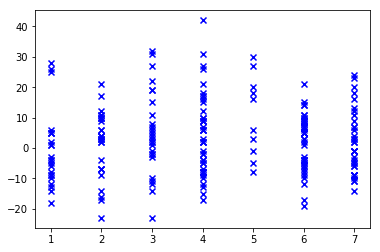

In [5]:
x = df['Day_Num'].tolist()
y = df['Spread'].tolist()

plt.scatter(x, y, c='b', marker='x', label='Spread')
plt.show()

In [11]:
df['Winner'] = df['Spread'] > 0

winner_di = {True: 1, False: 0}
df['Winner'].replace(winner_di, inplace=True)

df.head(10)

,Date,Day,Day_Num,Home,Visitor,Home_PTS,Visitor_PTS,Spread,#OTs,Winner
0,2010-11-01 19:00:00,Mon,2,Chicago Bulls,Portland Trail Blazers,110.0,98.0,12.0,0.0,1
1,2010-11-01 19:30:00,Mon,2,Los Angeles Clippers,San Antonio Spurs,88.0,97.0,-9.0,0.0,0
2,2010-11-01 19:00:00,Mon,2,Sacramento Kings,Toronto Raptors,111.0,108.0,3.0,0.0,1
3,2010-11-02 19:00:00,Tue,3,Cleveland Cavaliers,Atlanta Hawks,88.0,100.0,-12.0,0.0,0
4,2010-11-02 19:30:00,Tue,3,Detroit Pistons,Boston Celtics,86.0,109.0,-23.0,0.0,0
5,2010-11-02 19:30:00,Tue,3,Los Angeles Lakers,Memphis Grizzlies,124.0,105.0,19.0,0.0,1
6,2010-11-02 19:30:00,Tue,3,Miami Heat,Minnesota Timberwolves,129.0,97.0,32.0,0.0,1
7,2010-11-02 19:00:00,Tue,3,Milwaukee Bucks,Portland Trail Blazers,76.0,90.0,-14.0,0.0,0
8,2010-11-02 19:00:00,Tue,3,Washington Wizards,Philadelphia 76ers,116.0,115.0,1.0,1.0,1
9,2010-11-03 19:00:00,Wed,4,Atlanta Hawks,Detroit Pistons,94.0,85.0,9.0,0.0,1


In [12]:
win_totals = df['Winner'].value_counts()
num_games = len(df)
print(win_totals/num_games)

1    0.564815
0    0.435185
Name: Winner, dtype: float64


In [17]:
df.tail(10)

,Date,Visitor,Visitor_PTS,Home,Home_PTS,#OTs,Attend.,Day,Day_Num,Spread,Winner
206,2010-11-29 19:30:00,Washington Wizards,94.0,Miami Heat,105.0,0.0,19600.0,Mon,2,11.0,Home
207,2010-11-29 19:00:00,New Orleans Hornets,89.0,Oklahoma City Thunder,95.0,0.0,18203.0,Mon,2,6.0,Home
208,2010-11-29 19:00:00,Milwaukee Bucks,88.0,Utah Jazz,109.0,0.0,18497.0,Mon,2,21.0,Home
209,2010-11-30 19:00:00,Boston Celtics,NaN,Cleveland Cavaliers,NaN,NaN,NaN,Tue,3,NaN,Visitor
210,2010-11-30 19:30:00,San Antonio Spurs,NaN,Golden State Warriors,NaN,NaN,NaN,Tue,3,NaN,Visitor
211,2010-11-30 19:00:00,Los Angeles Lakers,NaN,Memphis Grizzlies,NaN,NaN,NaN,Tue,3,NaN,Visitor
212,2010-11-30 19:30:00,New Jersey Nets,NaN,New York Knicks,NaN,NaN,NaN,Tue,3,NaN,Visitor
213,2010-11-30 19:00:00,Detroit Pistons,NaN,Orlando Magic,NaN,NaN,NaN,Tue,3,NaN,Visitor
214,2010-11-30 19:00:00,Portland Trail Blazers,NaN,Philadelphia 76ers,NaN,NaN,NaN,Tue,3,NaN,Visitor
215,2010-11-30 19:00:00,Indiana Pacers,NaN,Sacramento Kings,NaN,NaN,NaN,Tue,3,NaN,Visitor


In [32]:
played_games = df['Spread'].count()
df_p = df.iloc[:played_games, :]
df_u = df.iloc[played_games:, :]
df_u.head()

,Date,Visitor,Visitor_PTS,Home,Home_PTS,#OTs,Attend.,Day,Day_Num,Spread,Winner
209,2010-11-30 19:00:00,Boston Celtics,NaN,Cleveland Cavaliers,NaN,NaN,NaN,Tue,3,NaN,Visitor
210,2010-11-30 19:30:00,San Antonio Spurs,NaN,Golden State Warriors,NaN,NaN,NaN,Tue,3,NaN,Visitor
211,2010-11-30 19:00:00,Los Angeles Lakers,NaN,Memphis Grizzlies,NaN,NaN,NaN,Tue,3,NaN,Visitor
212,2010-11-30 19:30:00,New Jersey Nets,NaN,New York Knicks,NaN,NaN,NaN,Tue,3,NaN,Visitor
213,2010-11-30 19:00:00,Detroit Pistons,NaN,Orlando Magic,NaN,NaN,NaN,Tue,3,NaN,Visitor


In [34]:
df.groupby('Visitor', as_index=False)['Visitor_PTS'].mean()

,Visitor,Visitor_PTS
0,Atlanta Hawks,100.000000
1,Boston Celtics,102.285714
2,Charlotte Bobcats,94.857143
3,Chicago Bulls,98.625000
4,Cleveland Cavaliers,100.714286
5,Dallas Mavericks,102.833333
6,Denver Nuggets,98.500000
7,Detroit Pistons,91.571429
8,Golden State Warriors,99.444444
9,Houston Rockets,99.125000


In [35]:
df.groupby('Home', as_index=False)['Home_PTS'].mean()

,Home,Home_PTS
0,Atlanta Hawks,97.625000
1,Boston Celtics,102.000000
2,Charlotte Bobcats,100.571429
3,Chicago Bulls,107.800000
4,Cleveland Cavaliers,89.333333
5,Dallas Mavericks,94.500000
6,Denver Nuggets,113.285714
7,Detroit Pistons,101.285714
8,Golden State Warriors,101.800000
9,Houston Rockets,106.166667


In [40]:
df.groupby('Visitor', as_index=False)['Spread'].mean()

,Visitor,Spread
0,Atlanta Hawks,-7.000000
1,Boston Celtics,-9.000000
2,Charlotte Bobcats,0.857143
3,Chicago Bulls,-0.625000
4,Cleveland Cavaliers,5.571429
5,Dallas Mavericks,-6.000000
6,Denver Nuggets,2.333333
7,Detroit Pistons,6.857143
8,Golden State Warriors,7.000000
9,Houston Rockets,5.750000


In [17]:
cols = ['Date', 'Day', 'Day_Num', 'Home', 'Visitor', 'Home_PTS', 'Visitor_PTS', 'Spread', '#OTs', 'Winner']
df = df[cols]
df.head()

,Date,Day,Day_Num,Home,Visitor,Home_PTS,Visitor_PTS,Spread,#OTs,Winner
0,2010-11-01 19:00:00,Mon,2,Chicago Bulls,Portland Trail Blazers,110.0,98.0,12.0,0.0,1
1,2010-11-01 19:30:00,Mon,2,Los Angeles Clippers,San Antonio Spurs,88.0,97.0,-9.0,0.0,0
2,2010-11-01 19:00:00,Mon,2,Sacramento Kings,Toronto Raptors,111.0,108.0,3.0,0.0,1
3,2010-11-02 19:00:00,Tue,3,Cleveland Cavaliers,Atlanta Hawks,88.0,100.0,-12.0,0.0,0
4,2010-11-02 19:30:00,Tue,3,Detroit Pistons,Boston Celtics,86.0,109.0,-23.0,0.0,0


In [20]:
df['Home_Wins'] = 0
df['Visitor_Wins'] = 0

In [25]:
df_vw.head()

,Date,Day,Day_Num,Home,Visitor,Home_PTS,Visitor_PTS,Spread,#OTs,Winner,Home_Wins,Visitor_Wins
1,2010-11-01 19:30:00,Mon,2,Los Angeles Clippers,San Antonio Spurs,88.0,97.0,-9.0,0.0,0,0,0
3,2010-11-02 19:00:00,Tue,3,Cleveland Cavaliers,Atlanta Hawks,88.0,100.0,-12.0,0.0,0,0,0
4,2010-11-02 19:30:00,Tue,3,Detroit Pistons,Boston Celtics,86.0,109.0,-23.0,0.0,0,0,0
7,2010-11-02 19:00:00,Tue,3,Milwaukee Bucks,Portland Trail Blazers,76.0,90.0,-14.0,0.0,0,0,0
11,2010-11-03 19:00:00,Wed,4,Denver Nuggets,Dallas Mavericks,101.0,102.0,-1.0,0.0,0,0,0


In [45]:
df['Visitor_Wins'] = df[df['Winner']==0].groupby(['Visitor']).cumcount() + 1
df['Home_Wins'] = df[df['Winner']==1].groupby(['Home']).cumcount() + 1

In [48]:
dftest = df[df['Home_Wins'].isnull()].groupby(['Home'])['Home_Wins'].transform(lambda x: x.shift())

In [146]:
#previous indexing doesn't work properly
for index, row in df.iterrows():
    if ((df[:index]['Home']==row['Home']) | (df[:index]['Visitor']==row['Home'])).any():
        
        try:
            last_home_idx = df[:index].loc[df['Home']==row['Home']].index[-1]
        except IndexError:
            last_home_idx = -1
        try:
            last_visitor_idx = df[:index].loc[df['Visitor']==row['Home']].index[-1]
        except IndexError:
            last_visitor_idx = -1
            
        if last_home_idx > last_visitor_idx:
            prev_index = last_home_idx
            if df.loc[prev_index, 'Winner'] == 1:
                df.loc[index, 'Home_Wins'] = df.loc[prev_index, 'Home_Wins'] + 1
            else:
                df.loc[index, 'Home_Wins'] = df.loc[prev_index, 'Home_Wins']
        else:
            prev_index = last_visitor_idx
            if df.loc[prev_index, 'Winner'] == 0:
                df.loc[index, 'Home_Wins'] = df.loc[prev_index, 'Visitor_Wins'] + 1
            else:
                df.loc[index, 'Home_Wins'] = df.loc[prev_index, 'Visitor_Wins']
        
    else:
        df.loc[index, 'Home_Wins'] = 0
        
        
    if ((df[:index]['Home']==row['Visitor']) | (df[:index]['Visitor']==row['Visitor'])).any():   
        
        try:
            last_home_idx = df[:index].loc[df['Home']==row['Visitor']].index[-1]
        except IndexError:
            last_home_idx = -1
        try:
            last_visitor_idx = df[:index].loc[df['Visitor']==row['Visitor']].index[-1]
        except IndexError:
            last_visitor_idx = -1
        
        if last_home_idx > last_visitor_idx:
            prev_index = last_home_idx
            if df.loc[prev_index, 'Winner'] == 1:
                df.loc[index, 'Visitor_Wins'] = df.loc[prev_index, 'Home_Wins'] + 1
            else:
                df.loc[index, 'Visitor_Wins'] = df.loc[prev_index, 'Home_Wins']
        else:
            prev_index =  last_visitor_idx
            if df.loc[prev_index, 'Winner'] == 0:
                df.loc[index, 'Visitor_Wins'] = df.loc[prev_index, 'Visitor_Wins'] + 1
            else:
                df.loc[index, 'Visitor_Wins'] = df.loc[prev_index, 'Visitor_Wins']
                
    else:
        df.loc[index, 'Visitor_Wins'] = 0

In [147]:
df.loc[((df['Home']=='Chicago Bulls') & (df['Winner']==1)) | ((df['Visitor']=='Chicago Bulls') & (df['Winner']==0))]

,Date,Day,Day_Num,Home,Visitor,Home_PTS,Visitor_PTS,Spread,#OTs,Winner,Home_Wins,Visitor_Wins
0,2010-11-01 19:00:00,Mon,2,Chicago Bulls,Portland Trail Blazers,110.0,98.0,12.0,0.0,1,0,0
51,2010-11-08 19:00:00,Mon,2,Chicago Bulls,Denver Nuggets,94.0,92.0,2.0,0.0,1,1,2
73,2010-11-11 19:00:00,Thu,5,Chicago Bulls,Golden State Warriors,120.0,90.0,30.0,0.0,1,2,4
86,2010-11-13 19:00:00,Sat,7,Chicago Bulls,Washington Wizards,103.0,96.0,7.0,0.0,1,3,2
108,2010-11-16 19:30:00,Tue,3,Houston Rockets,Chicago Bulls,92.0,95.0,-3.0,0.0,0,3,4
127,2010-11-19 20:30:00,Fri,6,Dallas Mavericks,Chicago Bulls,83.0,88.0,-5.0,0.0,0,5,5
172,2010-11-24 19:00:00,Wed,4,Phoenix Suns,Chicago Bulls,115.0,123.0,-8.0,2.0,0,6,6
195,2010-11-27 19:00:00,Sat,7,Sacramento Kings,Chicago Bulls,85.0,96.0,-11.0,0.0,0,2,7


In [121]:
index = 89
df[:index].loc[(df['Home']=='Miami Heat') | (df['Visitor']=='Miami Heat')].index[-1]

75

In [118]:
index = 20
df[:index]['Home']=='Miami Heat'

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: Home, dtype: bool